<a href="https://colab.research.google.com/github/jamestheengineer/data-science-from-scratch-Python/blob/master/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only do this once per VM, otherwise you'll get multiple clones and nested directories
!git clone https://github.com/jamestheengineer/data-science-from-scratch-Python.git
%cd data-science-from-scratch-Python/
!pip install import-ipynb

Cloning into 'data-science-from-scratch-Python'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 169 (delta 98), reused 2 (delta 1), pack-reused 0
Receiving objects: 100% (169/169), 211.26 KiB | 3.58 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/data-science-from-scratch-Python
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=404d7692abc3c9008154e1b079caa5b48f5f66b2634e29499adf7a3ebb255f98
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
# Working and Exploring data

# Exploring one-dimensional data 
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
  """Floor the point to the next lower multiple of bucket_size"""
  return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
  """Bickets the points and counts how many in each bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
  plt.title(title)


importing Jupyter notebook from Chapter_6.ipynb
P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


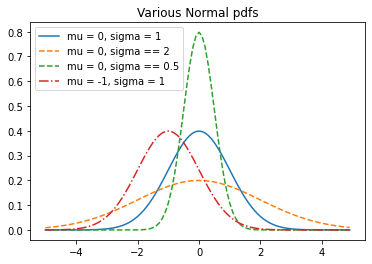

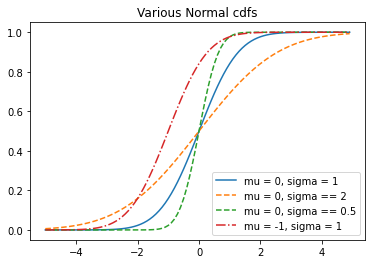

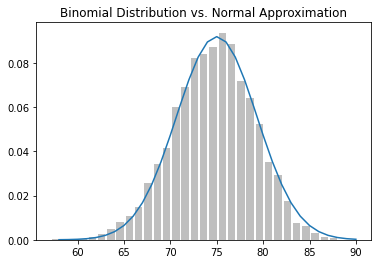

In [3]:
import random
import import_ipynb
from Chapter_6 import inverse_normal_cdf

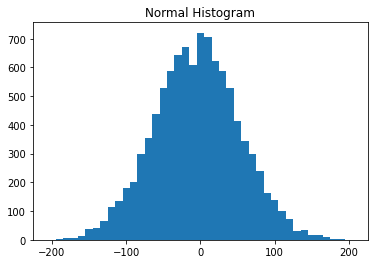

In [4]:
random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

#plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

In [0]:
# Two dimensions
def random_normal() -> float:
  """Returns a random draw from a standard normal distribution"""
  return inverse_normal_cdf(random.random())

In [0]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

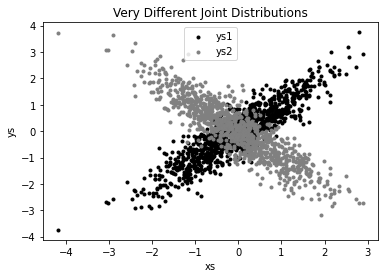

In [7]:
# Same histogram but different joint distributions
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

importing Jupyter notebook from Chapter_5.ipynb


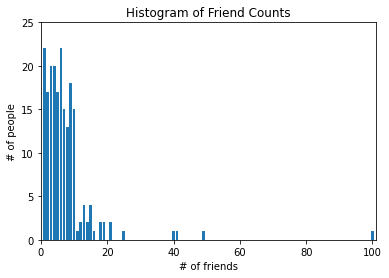

204 1 100.0 1 49
6.0
importing Jupyter notebook from Chapter_4.ipynb
0.9010493686379609
-0.8920981526880033


In [8]:
# The difference is also apparent when you look at the correlations
from Chapter_5 import correlation

print(correlation(xs, ys1))
print(correlation(xs, ys2))

In [0]:
from Chapter_4 import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
  """
  Returns the len(data) x len(data) matrix whose (i, j)-th entry
  is the correlation between data[i] and data[j]
  """
  def correlation_ij(i: int, j: int) -> float:
    return correlation(data[i], data[j])

  return make_matrix(len(data), len(data), correlation_ij)

# corr_data is a list of four 100-d vectors
# Hmmm..don't see this in Joel's github repo. Not sure where the data is.
#num_vectors = len(corr_data)
#fig, ax = plt.subplots(num_vectors, num_vectors)

#for i in range(num_vectors):
#  for j in range(num_vectors):
#    #Scatter column_j on the x-axis vs. column_i on the y-axis
#    if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

    # unless i == j, in which case show the series name
#    else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
#                            xycoords='axes fraction',
#                            ha="center", va="center")
    
    # Then hide axis labels except left and bottom charts
#    if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
#    if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
#ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
#ax[0][0].set_ylim(ax[0][1].get_ylim())

#plt.show()